# Initialization for prediction

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Autoreload allows the notebook to dynamically load code: if we update some helper functions outside of the notebook, we do not need to reload the notebook.
%load_ext autoreload
%autoreload 2

# All auxiliary code is in ../src
# code taken from: https://github.com/data-mining-UniPI/teaching24/tree/main/src
import sys
sys.path.append("./src/")

# Set style for seaborn
sns.set_theme(style="darkgrid")

# Other available themes:
# sns.set_theme(style="whitegrid")
# sns.set_theme(style="dark")
# sns.set_theme(style="white")
# sns.set_theme(style="ticks")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:

# Load datasets
cyclists_df = pd.read_pickle('cyclists_transformed.pkl')
races_df = pd.read_pickle('races_transformed.pkl')

# Display info
print("Cyclists DataFrame:")
# print(cyclists_df.info())
cyclists_df.head()
print("\nRaces DataFrame:")
# print(races_df.info())
races_df.head()

Cyclists DataFrame:

Races DataFrame:


,_url,name,points,length,climb_total,startlist_quality,position,cyclist,cyclist_age,cyclist_team,delta,day,year
0,tour-de-france/1978/stage-6,tour de france,100,162000,1101,1241,0,sean-kelly,22,vini-ricordi-pinarello-sidermec-1986,0,1978-07-05,1978
1,tour-de-france/1978/stage-6,tour de france,100,162000,1101,1241,1,gerrie-knetemann,27,norway-1987,0,1978-07-05,1978
2,tour-de-france/1978/stage-6,tour de france,100,162000,1101,1241,2,rene-bittinger,24,unknown,0,1978-07-05,1978
3,tour-de-france/1978/stage-6,tour de france,100,162000,1101,1241,3,joseph-bruyere,30,navigare-blue-storm-1993,0,1978-07-05,1978
4,tour-de-france/1978/stage-6,tour de france,100,162000,1101,1241,4,sven-ake-nilsson,27,spain-1991,0,1978-07-05,1978


In [19]:
races_merged_df = pd.merge(races_df, cyclists_df, left_on='cyclist', right_on='_url')
races_merged_df.head()

,_url_x,name_x,points,length,climb_total,startlist_quality,position,cyclist,cyclist_age,cyclist_team,...,name_y,birth_year,weight,height,nationality,bmi,races_participated,average_delta,average_climb_total,average_length
0,tour-de-france/1978/stage-6,tour de france,100,162000,1101,1241,1,gerrie-knetemann,27,norway-1987,...,gerrie knetemann,1951,80,185,netherlands,23.4,252,298,1736,160777
1,tour-de-france/1978/stage-6,tour de france,100,162000,1101,1241,2,rene-bittinger,24,unknown,...,rené bittinger,1954,69,174,france,22.8,146,239,1571,171172
2,tour-de-france/1978/stage-6,tour de france,100,162000,1101,1241,3,joseph-bruyere,30,navigare-blue-storm-1993,...,joseph bruyère,1948,75,182,belgium,22.6,33,78,1604,157898
3,tour-de-france/1978/stage-6,tour de france,100,162000,1101,1241,4,sven-ake-nilsson,27,spain-1991,...,sven-åke nilsson,1951,63,172,sweden,21.3,145,129,1814,168843
4,tour-de-france/1978/stage-6,tour de france,100,162000,1101,1241,5,jacques-esclassan,30,kelme-costa-blanca-2000,...,jacques esclassan,1948,60,166,france,21.8,47,368,1793,157851


## Sampling

In [20]:
SAMPLE_FRACTION = 0.10
print(f"Sampling {SAMPLE_FRACTION*100}% of the dataset. That is {int(SAMPLE_FRACTION * len(races_merged_df))} rows.")
sampled_df = races_merged_df.sample(frac=SAMPLE_FRACTION, random_state=42)
#TODO: togliere?

Sampling 10.0% of the dataset. That is 33580 rows.


## Utilities

In [21]:
from sklearn.metrics import classification_report
def report_scores(labels, predictions):
    print(classification_report(labels, predictions, target_names=['Not Top-20', 'Top-20']))
    

def plot_confusion_matrix(test_labels, predictions, title='Confusion Matrix'):
    cm = confusion_matrix(test_labels, predictions)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Not Top-20', 'Top-20'], yticklabels=['Not Top-20', 'Top-20'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

## Computing the labels

In [22]:
races_merged_df['is_top_20'] = (races_merged_df['position'] <= 20).astype(int)
races_merged_df.head()

,_url_x,name_x,points,length,climb_total,startlist_quality,position,cyclist,cyclist_age,cyclist_team,...,birth_year,weight,height,nationality,bmi,races_participated,average_delta,average_climb_total,average_length,is_top_20
0,tour-de-france/1978/stage-6,tour de france,100,162000,1101,1241,1,gerrie-knetemann,27,norway-1987,...,1951,80,185,netherlands,23.4,252,298,1736,160777,1
1,tour-de-france/1978/stage-6,tour de france,100,162000,1101,1241,2,rene-bittinger,24,unknown,...,1954,69,174,france,22.8,146,239,1571,171172,1
2,tour-de-france/1978/stage-6,tour de france,100,162000,1101,1241,3,joseph-bruyere,30,navigare-blue-storm-1993,...,1948,75,182,belgium,22.6,33,78,1604,157898,1
3,tour-de-france/1978/stage-6,tour de france,100,162000,1101,1241,4,sven-ake-nilsson,27,spain-1991,...,1951,63,172,sweden,21.3,145,129,1814,168843,1
4,tour-de-france/1978/stage-6,tour de france,100,162000,1101,1241,5,jacques-esclassan,30,kelme-costa-blanca-2000,...,1948,60,166,france,21.8,47,368,1793,157851,1


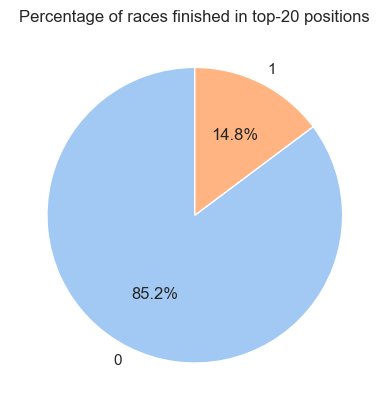

In [23]:
is_top_20_counts = races_merged_df['is_top_20'].value_counts()
is_top_20_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Percentage of races finished in top-20 positions')
plt.ylabel('')
plt.show()

## Selecting the columns

Selecting only the columns relevant and useful for prediction and dropping the rest.
Since we want to predict the outcome of the race, we will also drop the columns that are not available before the match starts.

In [24]:
columns_to_drop = ['_url_x', 'name_x', '_url_y', 'name_y', 'cyclist', 'cyclist_team', 'day', 'birth_year', 'delta', 'average_delta', 'position']
races_merged_df.drop(columns=columns_to_drop, inplace=True)
races_merged_df.head()

,points,length,climb_total,startlist_quality,cyclist_age,year,weight,height,nationality,bmi,races_participated,average_climb_total,average_length,is_top_20
0,100,162000,1101,1241,27,1978,80,185,netherlands,23.4,252,1736,160777,1
1,100,162000,1101,1241,24,1978,69,174,france,22.8,146,1571,171172,1
2,100,162000,1101,1241,30,1978,75,182,belgium,22.6,33,1604,157898,1
3,100,162000,1101,1241,27,1978,63,172,sweden,21.3,145,1814,168843,1
4,100,162000,1101,1241,30,1978,60,166,france,21.8,47,1793,157851,1


## Discretizing the data

The categorical column "nationality" is discretized.

In [25]:
# function to discretize the variables
# input: the dataset and the list of variables' names to discretize
# credits: https://github.com/data-mining-UniPI/teaching24/blob/main/notebooks/machine_learning.ipynb
def discretize_data(dataset, variables):
    dataset_copy = dataset.copy()
    for variable in variables:
        # get the unique variable's values
        var = sorted(dataset_copy[variable].unique())
        
        # generate a mapping from the variable's values to the number representation  
        mapping = dict(zip(var, range(0, len(var) + 1)))

        # add a new column with the number representation of the variable
        dataset_copy[variable + '_num'] = dataset_copy[variable].map(mapping).astype(int)
    return dataset_copy

In [26]:
categorical_variables = ['nationality']
categorical_variables_discretized = [var + '_num' for var in categorical_variables]

In [27]:
races_merged_discretized_df = discretize_data(races_merged_df, categorical_variables)
races_merged_discretized_df.drop(columns=categorical_variables, inplace=True)
races_merged_discretized_df.head()

,points,length,climb_total,startlist_quality,cyclist_age,year,weight,height,bmi,races_participated,average_climb_total,average_length,is_top_20,nationality_num
0,100,162000,1101,1241,27,1978,80,185,23.4,252,1736,160777,1,44
1,100,162000,1101,1241,24,1978,69,174,22.8,146,1571,171172,1,24
2,100,162000,1101,1241,30,1978,75,182,22.6,33,1604,157898,1,7
3,100,162000,1101,1241,27,1978,63,172,21.3,145,1814,168843,1,59
4,100,162000,1101,1241,30,1978,60,166,21.8,47,1793,157851,1,24


Now we have:
- races_merged_discretized_df: the dataset, discretized

TODO: quando fai knn fai attenzione a non usare le colonne che hai dicretizzato credo

## Splitting for Training, Validation, and Test Sets

We will split our datasets into training, validation, and test sets.

The test set will consist of races from the year 2022 and onward, as requested in the project description. The remaining data will be split into training and validation sets. 

- The **training** set will be used to train the model
- The **validation** set will be used to tune and validate the model during the training process.
- The **test set** will be used at the end to evaluate the model's performance on unseen data.

In [28]:
from sklearn.model_selection import train_test_split

# Splits the data into training, validation, and test sets
def split_data(df, label_column):
    train_df = df[df['year'] < 2022]
    test_df = df[df['year'] >= 2022]

    # Further split the training set into training and validation sets
    train_set, validation_set = train_test_split(train_df, test_size=0.2, random_state=42)

    # Extract labels
    train_labels = train_set[label_column]
    validation_labels = validation_set[label_column]
    test_labels = test_df[label_column]

    # Drop labels from the datasets
    train_set = train_set.drop(columns=[label_column])
    validation_set = validation_set.drop(columns=[label_column])
    test_df = test_df.drop(columns=[label_column])

    return train_set, validation_set, test_df, train_labels, validation_labels, test_labels

In [29]:
train_set, validation_set, test_set, train_labels, validation_labels, test_labels = split_data(races_merged_discretized_df, 'is_top_20')

In [30]:
total_discretized = len(races_merged_discretized_df)
print(f"Discretized Data - Training set: {len(train_set)} ({len(train_set) / total_discretized:.2%}), Validation set: {len(validation_set)} ({len(validation_set) / total_discretized:.2%}), Test set: {len(test_set)} ({len(test_set) / total_discretized:.2%})")

Discretized Data - Training set: 248195 (73.91%), Validation set: 62049 (18.48%), Test set: 25559 (7.61%)


# Classification with KNN

In [34]:
# dropping the categorical columns
print(f"Dropping these columns: {categorical_variables_discretized}")
train_set_no_categorical = train_set.drop(columns=categorical_variables_discretized)
validation_set_no_categorical = validation_set.drop(columns=categorical_variables_discretized)
test_set_no_categorical = test_set.drop(columns=categorical_variables_discretized)

Dropping these columns: ['nationality_num']


In [32]:
knn_params_grid = {
    'n_neighbors': range(1, 21),
    'metric': ['euclidean', 'manhattan'],
    'weights': ['uniform', 'distance']
}

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn_random_search = RandomizedSearchCV(
    KNeighborsClassifier(),
    knn_params_grid,
    n_iter=50,  # Number of parameter settings sampled
    cv=5,
    n_jobs=-1,  # Use all available cores
    random_state=42,
    #verbose=3
)

knn_random_search.fit(train_set_no_categorical, train_labels)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=50, n_jobs=-1,
                   param_distributions={'metric': ['euclidean', 'manhattan'],
                                        'n_neighbors': range(1, 21),
                                        'weights': ['uniform', 'distance']},
                   random_state=42)

## Evaluation

Evaluating the performance of this classifier wrt the training and validation sets.

In [36]:
best_knn = KNeighborsClassifier(**knn_random_search.best_params_)
best_knn.fit(train_set_no_categorical, train_labels)

training_predictions_knn = best_knn.predict(train_set_no_categorical)
validation_predictions_knn = best_knn.predict(validation_set_no_categorical)

In [37]:
print(f"KNN EVALUATION")

print(f"Best parameters found by grid search: {knn_random_search.best_params_}")
print(f"Their accuracy on the train set is: {knn_random_search.best_score_:.2f}")

print(f"SAMPLE_FRACTION={SAMPLE_FRACTION}")
print ("\n")

print("Report of the performance on the TRAINING set:")
report_scores(train_labels, training_predictions_knn)
print("\nReport of the performance on the VALIDATION set:")
report_scores(validation_labels, validation_predictions_knn)

KNN EVALUATION
Best parameters found by grid search: {'weights': 'uniform', 'n_neighbors': 12, 'metric': 'manhattan'}
Their accuracy on the train set is: 0.85
SAMPLE_FRACTION=0.1


Report of the performance on the TRAINING set:
              precision    recall  f1-score   support

  Not Top-20       0.86      1.00      0.92    211461
      Top-20       0.76      0.08      0.14     36734

    accuracy                           0.86    248195
   macro avg       0.81      0.54      0.53    248195
weighted avg       0.85      0.86      0.81    248195


Report of the performance on the VALIDATION set:
              precision    recall  f1-score   support

  Not Top-20       0.86      0.99      0.92     52836
      Top-20       0.62      0.05      0.10      9213

    accuracy                           0.85     62049
   macro avg       0.74      0.52      0.51     62049
weighted avg       0.82      0.85      0.80     62049



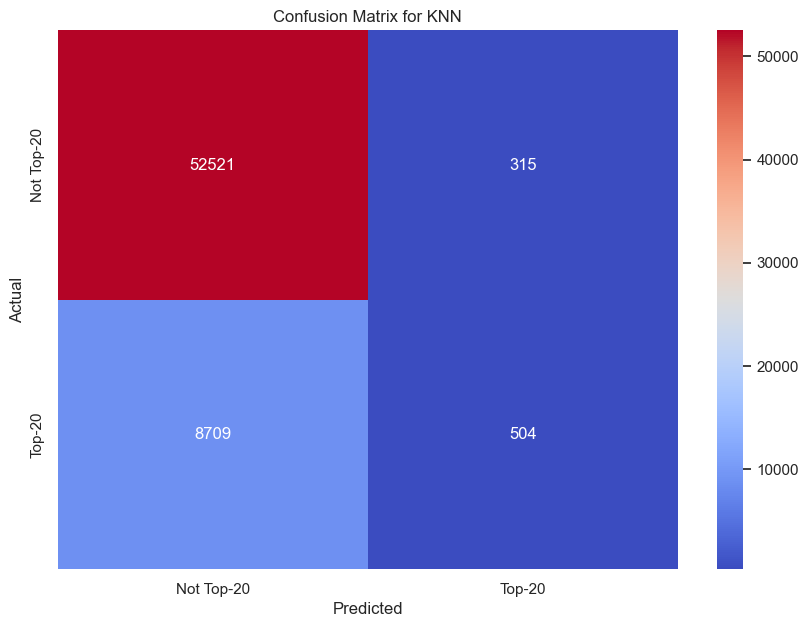

In [38]:
plot_confusion_matrix(validation_labels, validation_predictions_knn, title='Confusion Matrix for KNN')

# Classification with Naive Bayes

In [39]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(train_set, train_labels)

GaussianNB()

In [40]:
train_predictions_gnb = gnb.predict(train_set)
validation_predictions_gnb = gnb.predict(validation_set)

In [41]:
print(f"GNB EVALUATION")

print("Report of the performance on the TRAINING set:")
report_scores(train_labels, train_predictions_gnb)
print("\nReport of the performance on the VALIDATION set:")
report_scores(validation_labels, validation_predictions_gnb)

GNB EVALUATION
Report of the performance on the TRAINING set:
              precision    recall  f1-score   support

  Not Top-20       0.86      0.96      0.91    211461
      Top-20       0.33      0.11      0.17     36734

    accuracy                           0.83    248195
   macro avg       0.59      0.54      0.54    248195
weighted avg       0.78      0.83      0.80    248195


Report of the performance on the VALIDATION set:
              precision    recall  f1-score   support

  Not Top-20       0.86      0.96      0.91     52836
      Top-20       0.35      0.12      0.18      9213

    accuracy                           0.84     62049
   macro avg       0.60      0.54      0.54     62049
weighted avg       0.79      0.84      0.80     62049



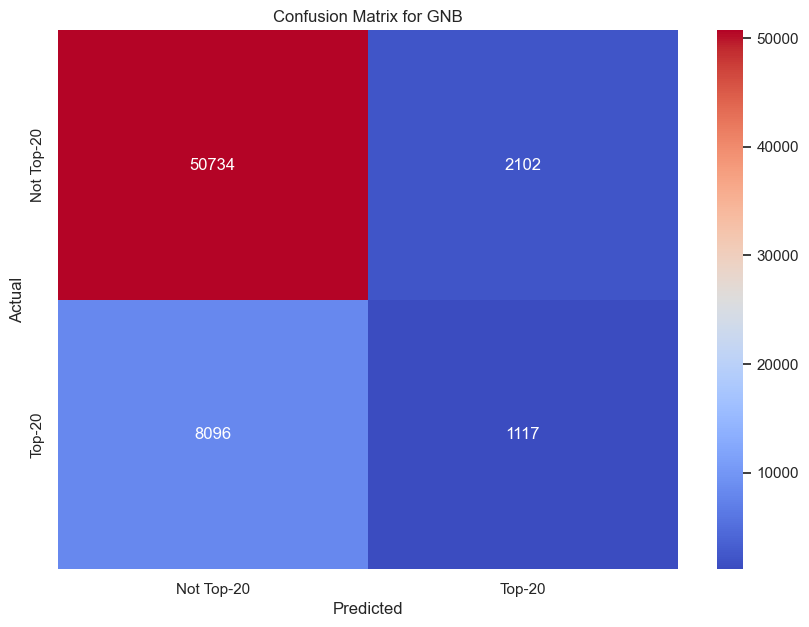

In [42]:
plot_confusion_matrix(validation_labels, validation_predictions_gnb, title='Confusion Matrix for GNB')